In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
metadata = [
  ("/Users/matheusmota/src/github/msc/msc-proj/data/experiments/exp_20260108_004747/experiment_results.csv", 0.50),
  ("/Users/matheusmota/src/github/msc/msc-proj/data/experiments/exp_20260108_010516/experiment_results.csv", 0.75),
  ("/Users/matheusmota/src/github/msc/msc-proj/data/experiments/exp_20260108_012824/experiment_results.csv", 1.00),
]

# metadata = [
#   ("/Users/matheusmota/src/github/msc/msc-proj/data/experiments/exp_20260108_004747/experiment_results.csv", 1.00),
# ]

In [96]:
df = pd.read_csv(metadata[2][0])

In [97]:
print(df.to_markdown())

|    | experiment_name                 | status   |   execution_time_minutes |   error_message |   true_positives |   false_positives |   true_negatives |   false_negatives |   total_positives |   total_negatives |   precision |   recall |   f2_score |   wss95 |   peak_memory_mb |   average_memory_mb |   peak_cpu_percent |   average_cpu_percent |   throughput_samples_per_second |   average_latency_ms |   data_loading_time_ms |   model_training_time_ms |   model_evaluation_time_ms |   total_execution_time_ms |   memory_efficiency |   cpu_efficiency |   energy_efficiency_score |
|---:|:--------------------------------|:---------|-------------------------:|----------------:|-----------------:|------------------:|-----------------:|------------------:|------------------:|------------------:|------------:|---------:|-----------:|--------:|-----------------:|--------------------:|-------------------:|----------------------:|--------------------------------:|---------------------:|-----------

In [76]:
all_data = []
for filepath, perc in metadata:
  df = pd.read_csv(filepath)
  df['percentual_usado'] = perc
  all_data.append(df)

df = pd.concat(all_data, ignore_index=True)

df = df.rename(columns={
  'execution_time_minutes': 'tempo_exec_minutos',
  'peak_memory_mb': 'memoria_pico_mb',
  'average_memory_mb': 'memoria_media_mb',
  'peak_cpu_percent': 'cpu_pico_percentual',
  'average_cpu_percent': 'cpu_medio_percentual',
})

In [77]:
cols_map = {
  'tempo_exec_minutos': 'T (min)', # Tempo de execução
  'memoria_pico_mb': 'Memória Pico (MB)',
  'memoria_media_mb': 'Memória Média (MB)',
  'cpu_pico_percentual': 'CPU Pico (\\%)',
  'cpu_medio_percentual': 'CPU Médio (\\%)',
  'true_positives': 'TP',
  'false_positives': 'FP',
  'true_negatives': 'TN',
  'false_negatives': 'FN',
  'total_positives': 'P',
  'total_negatives': 'N',
  'precision': 'Precisão',
  'recall': 'recall',
  'f2_score': 'f2_score',
  'wss95': '$WSS@95\\%$',
  'throughput_samples_per_second': 'TS (amostras/s)',
  'average_latency_ms': 'L (ms)', # Latência média
  'data_loading_time_ms': 'TC (ms)', # Tempo de carregamento dos dados
  'experiment_name': 'Experimento',
  'perencial_usado': 'U (\\%)',
  'memory_efficiency': 'Eficiência de Memória',
  'cpu_efficiency': 'Eficiência de CPU',
  'energy_efficiency_score': 'Eficiência Energética',
  'percentual_usado': 'U (\\%)'
}

df_latex = df.rename(columns=cols_map)

group_map = {
  "Descrição": [cols_map["experiment_name"], cols_map["tempo_exec_minutos"]],
  "Métricas de Classificação": [
      cols_map["true_positives"], cols_map["false_positives"], cols_map["true_negatives"], cols_map["false_negatives"], cols_map["total_positives"], cols_map["total_negatives"], cols_map["precision"], cols_map["recall"], cols_map["f2_score"], cols_map["wss95"]
  ],
  "Uso de Memória": [cols_map["memoria_pico_mb"], cols_map["memoria_media_mb"]],
  "Uso de CPU": [cols_map["cpu_pico_percentual"], cols_map["cpu_medio_percentual"]],
  "Eficiência de Tempo": [
      cols_map["throughput_samples_per_second"], cols_map["average_latency_ms"], cols_map["data_loading_time_ms"]
  ],
  "Eficiências": [cols_map["memory_efficiency"], cols_map["cpu_efficiency"], cols_map["energy_efficiency_score"]],
  "Percentual de Dados Usados": [cols_map["percentual_usado"]]
}

In [78]:
import numbers

header_1 = []
header_2 = []
for supercol, subcols in group_map.items():
    header_1.append(r"\multicolumn{%d}{c}{%s}" % (len(subcols), supercol))
    header_2.extend([col.replace('_', r'\_') for col in subcols])

# Gerar tabela em LaTeX
colspec = "|" + "|".join([r"m{1.7cm}"]*len(header_2)) + "|"

table_latex = []

table_latex = []
table_latex.append(r"\resizebox{\textwidth}{!}{%")
table_latex.append(r"\begin{tabular}{%s}" % colspec)
table_latex.append(r"\hline")
table_latex.append(" & ".join(header_1) + r" \\")
table_latex.append(" & ".join(header_2) + r" \\")
table_latex.append(r"\hline")

for i, row in df_latex.iterrows():
    vals = []
    for grupo in group_map.values():
        for col in grupo:
            # val = row[col]
            # val = "" if pd.isnull(val) else val
            # vals.append(str(val))
            val = row[col]
            if pd.isnull(val):
                vals.append("")
            elif isinstance(val, numbers.Number):
                vals.append(f"{val:.2f}")
            else:
                vals.append(str(val))
    table_latex.append(" & ".join(vals) + r" \\")

table_latex.append(r"\hline")
table_latex.append(r"\end{tabular}")
table_latex.append(r"}")

print("\n".join(table_latex))

\resizebox{\textwidth}{!}{%
\begin{tabular}{|m{1.7cm}|m{1.7cm}|m{1.7cm}|m{1.7cm}|m{1.7cm}|m{1.7cm}|m{1.7cm}|m{1.7cm}|m{1.7cm}|m{1.7cm}|m{1.7cm}|m{1.7cm}|m{1.7cm}|m{1.7cm}|m{1.7cm}|m{1.7cm}|m{1.7cm}|m{1.7cm}|m{1.7cm}|m{1.7cm}|m{1.7cm}|m{1.7cm}|m{1.7cm}|}
\hline
\multicolumn{2}{c}{Descrição} & \multicolumn{10}{c}{Métricas de Classificação} & \multicolumn{2}{c}{Uso de Memória} & \multicolumn{2}{c}{Uso de CPU} & \multicolumn{3}{c}{Eficiência de Tempo} & \multicolumn{3}{c}{Eficiências} & \multicolumn{1}{c}{Percentual de Dados Usados} \\
Experimento & T (min) & TP & FP & TN & FN & P & N & Precisão & recall & f2\_score & $WSS@95\%$ & Memória Pico (MB) & Memória Média (MB) & CPU Pico (\%) & CPU Médio (\%) & TS (amostras/s) & L (ms) & TC (ms) & Eficiência de Memória & Eficiência de CPU & Eficiência Energética & U (\%) \\
\hline
SVM with GloVe and TF-IDF & 0.22 & 4.00 & 185.00 & 11.00 & 0.00 & 4.00 & 196.00 & 0.02 & 1.00 & 0.10 & 0.00 & 3368.88 & 3040.51 & 83.90 & 16.06 & 15.16 & 0.00 & 0.00 & 0

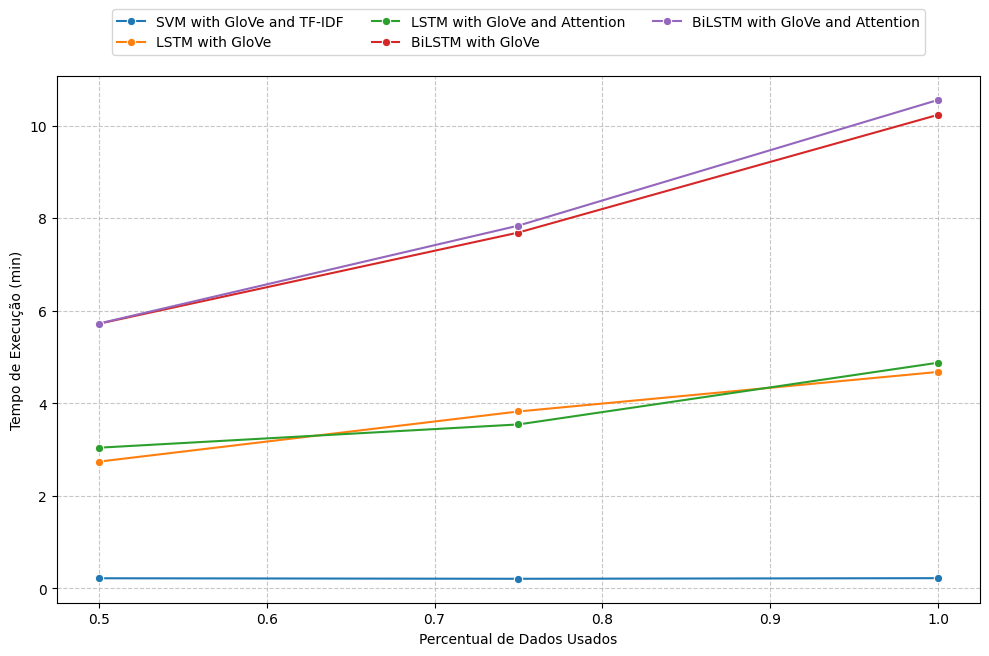

In [79]:
# Gráfico: tempo de execução vs percentual de dados
label = 'Experimento'
df1 = df.rename(columns={'experiment_name': label})

plt.figure(figsize=(10,6))
sns.lineplot(data=df1, x='percentual_usado', y='tempo_exec_minutos', hue=label, marker='o')
plt.xlabel('Percentual de Dados Usados')
plt.ylabel('Tempo de Execução (min)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.14),
    ncol=3,
    frameon=True
)
plt.savefig('05a_Duracao_Dados_Usados.svg', format='svg', bbox_inches='tight')
plt.savefig('05a_Duracao_Dados_Usados.jpg', format='jpg', bbox_inches='tight')
plt.show()


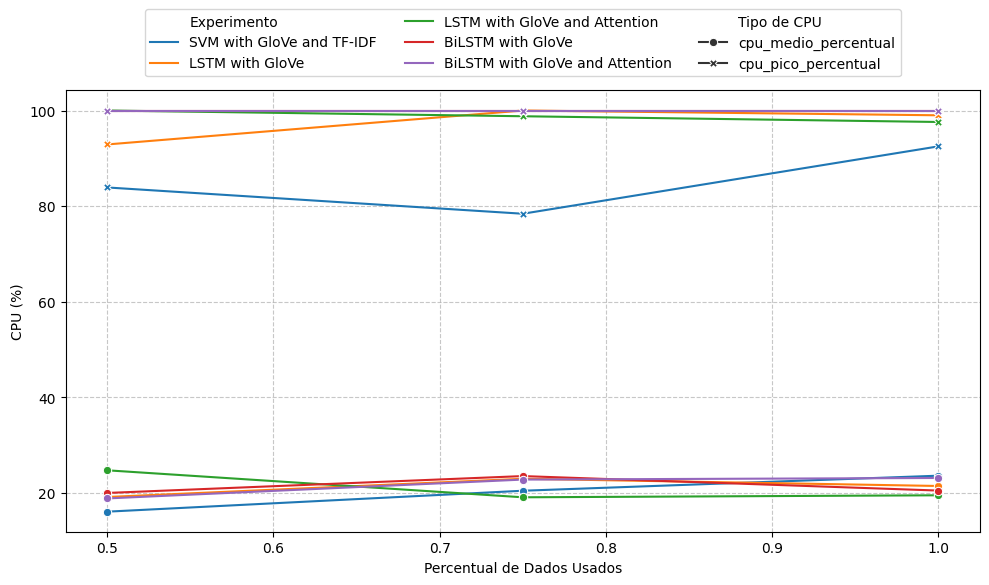

In [80]:
# Gráfico: uso de CPU médio e pico
label = 'Experimento'
label_tipo_cpu = 'Tipo de CPU'
label_cpu_percentual = 'Percentual de CPU'

cpu_df = df.melt(
    id_vars=['percentual_usado', 'experiment_name'],
    value_vars=['cpu_medio_percentual', 'cpu_pico_percentual'],
    var_name='tipo_cpu',
    value_name='cpu_percentual'
)

cpu_df = cpu_df.rename(columns={'experiment_name': label, 'tipo_cpu': label_tipo_cpu, 'cpu_percentual': label_cpu_percentual})

plt.figure(figsize=(10,6))
sns.lineplot(
    data=cpu_df,
    x='percentual_usado',
    y=label_cpu_percentual,
    hue=label,
    style=label_tipo_cpu,
    markers=True,
    dashes=False
)
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.20),
    ncol=3,
    frameon=True
)
plt.xlabel('Percentual de Dados Usados')
plt.ylabel('CPU (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('05b_Uso_Medio_CPU_Dados_Usados.svg', format='svg', bbox_inches='tight')
plt.savefig('05b_Uso_Medio_CPU_Dados_Usados.jpg', format='jpg', bbox_inches='tight')
plt.show()


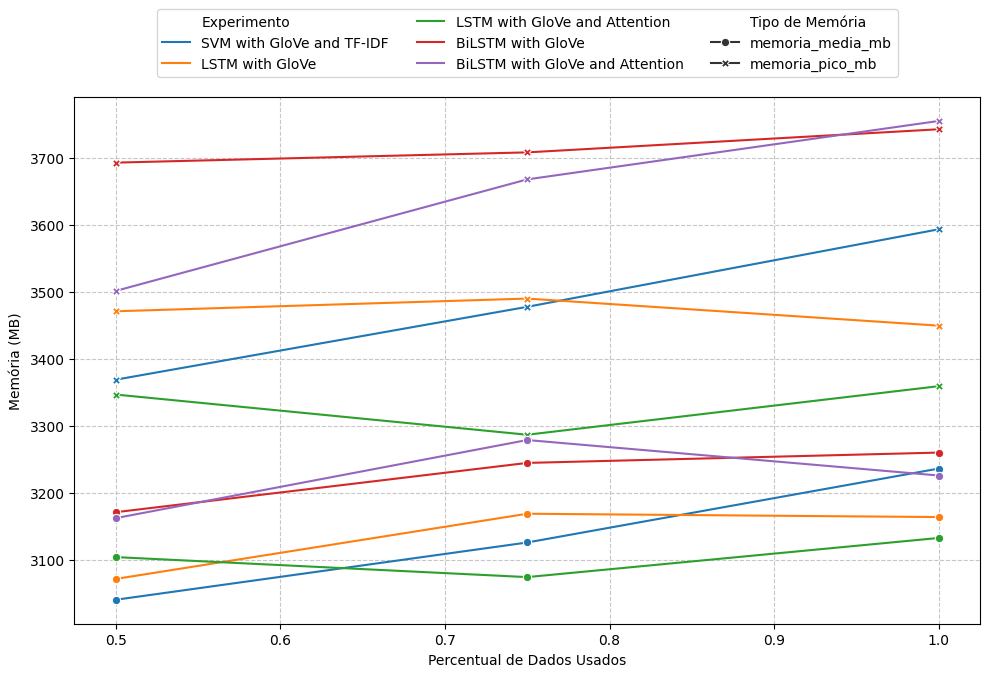

In [81]:
# Gráfico: uso de memória médio e pico
label = 'Experimento'
label_tipo_memoria = 'Tipo de Memória'
label_memoria_mb = 'Memória (MB)'

mem_df = df.melt(
    id_vars=['percentual_usado', 'experiment_name'],
    value_vars=['memoria_media_mb', 'memoria_pico_mb'],
    var_name='tipo_memoria',
    value_name='memoria_mb'
)

mem_df = mem_df.rename(columns={'experiment_name': label, 'tipo_memoria': label_tipo_memoria, 'memoria_mb': label_memoria_mb})

plt.figure(figsize=(10,6))
ax = sns.lineplot(
    data=mem_df,
    x='percentual_usado',
    y=label_memoria_mb,
    hue=label,
    style=label_tipo_memoria,
    markers=True,
    dashes=False
)
plt.xlabel('Percentual de Dados Usados')
plt.ylabel('Memória (MB)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.18),
    ncol=3,
    frameon=True
)

plt.savefig('05c_Memoria_Dados_Usados.svg', format='svg', bbox_inches='tight')
plt.savefig('05c_Memoria_Dados_Usados.jpg', format='jpg', bbox_inches='tight')
plt.show()



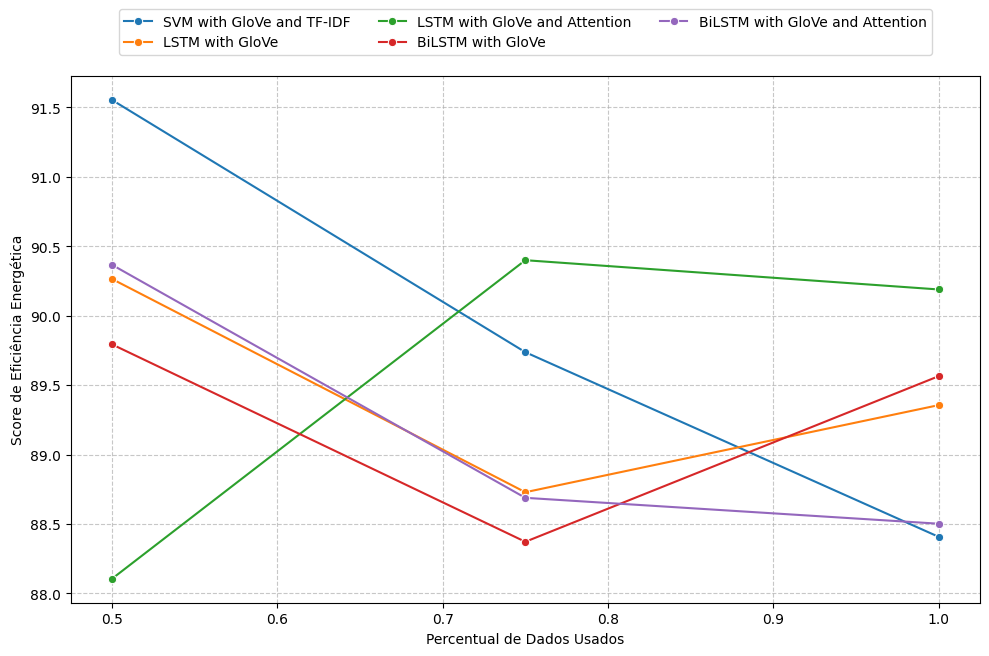

In [82]:

# Gráfico: eficiência energética do experimento
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='percentual_usado', y='energy_efficiency_score', hue='experiment_name', marker='o')
plt.xlabel('Percentual de Dados Usados')
plt.ylabel('Score de Eficiência Energética')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.14),
    ncol=3,
    frameon=True
)

plt.savefig('05d_Eficiencia_Energetica_Dados_Usados.svg', format='svg', bbox_inches='tight')
plt.savefig('05d_Eficiencia_Energetica_Dados_Usados.jpg', format='jpg', bbox_inches='tight')
plt.show()


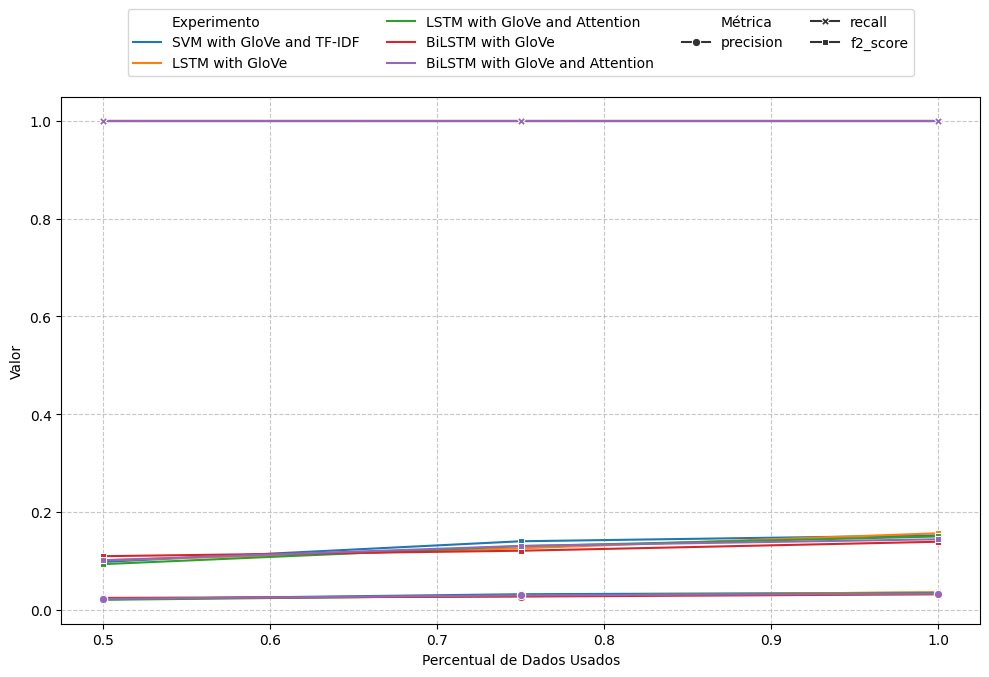

In [83]:
# Gráfico: precisão, recall e F2 score
label = 'Experimento'
label_metrica = 'Métrica'
label_valor = 'Valor'

long_df = df.melt(
    id_vars=['percentual_usado', 'experiment_name'],
    value_vars=['precision', 'recall', 'f2_score'],
    var_name='métrica',
    value_name='valor'
)

long_df = long_df.rename(columns={'experiment_name': label, 'métrica': label_metrica, 'valor': label_valor})

plt.figure(figsize=(10,6))
sns.lineplot(
    data=long_df,
    x='percentual_usado',
    y=label_valor,
    hue=label,
    style=label_metrica,
    markers=True,
    dashes=False
)
plt.xlabel('Percentual de Dados Usados')
plt.ylabel('Valor')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.18),
    ncol=4,
    frameon=True
)

plt.savefig('05e_Metricas_Dados_Usados.svg', format='svg', bbox_inches='tight')
plt.savefig('05e_Metricas_Dados_Usados.jpg', format='jpg', bbox_inches='tight')
plt.show()


In [84]:
import platform
import psutil
import os
import subprocess

# Sistema Operacional
so = platform.system()
versao = platform.version()
release = platform.release()
arquitetura = platform.machine()

# Processador
cpu = platform.processor()
nucleos_fisicos = psutil.cpu_count(logical=False)
nucleos_logicos = psutil.cpu_count(logical=True)
freq = psutil.cpu_freq()

# Memória
mem = psutil.virtual_memory()

# Disco
disco = psutil.disk_usage('/')

# GPU (pouco suporte em Mac, mas tenta via system_profiler)
def get_gpu():
    try:
        output = subprocess.check_output(['system_profiler', 'SPDisplaysDataType'])
        return output.decode()
    except Exception:
        return 'Não disponível'

# Exibir resultados
print(f"Sistema: {so}\nVersão: {release}\nArquitetura: {arquitetura}")
print(f"Processador: {cpu}\nNúcleos físicos: {nucleos_fisicos}\nNúcleos lógicos: {nucleos_logicos}")
if freq:
    print(f"Frequência atual: {freq.current:.2f} MHz")
print(f"Memória total: {mem.total/2**30:.2f} GB")
print(f"Disco total: {disco.total/2**30:.2f} GB, Livre: {disco.free/2**30:.2f} GB")
print(f"GPU: {get_gpu()}")


Sistema: Darwin
Versão: 24.6.0
Arquitetura: arm64
Processador: arm
Núcleos físicos: 8
Núcleos lógicos: 8
Frequência atual: 3204.00 MHz
Memória total: 8.00 GB
Disco total: 228.27 GB, Livre: 18.65 GB
GPU: Graphics/Displays:

    Apple M1:

      Chipset Model: Apple M1
      Type: GPU
      Bus: Built-In
      Total Number of Cores: 7
      Vendor: Apple (0x106b)
      Metal Support: Metal 3
      Displays:
        Color LCD:
          Display Type: Built-In Retina LCD
          Resolution: 2560 x 1600 Retina
          Main Display: Yes
          Mirror: Off
          Online: Yes
          Automatically Adjust Brightness: Yes
          Connection Type: Internal




In [85]:
SOURCE_INPUT_FILES = [
  ("UrinaryIncontinence.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Cohen_2006/output/local/UrinaryIncontinence.csv"),
  ("Hall_2012.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Hall_Wahono_Radjenovic_Kitchenham/output/Hall_2012.csv"),
  ("ProtonPumpInhibitors.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Cohen_2006/output/local/ProtonPumpInhibitors.csv"),
  ("van_de_Schoot_2017.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/van_de_Schoot_2017/output/van_de_Schoot_2017.csv"),
  ("SkeletalMuscleRelaxants.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Cohen_2006/output/local/SkeletalMuscleRelaxants.csv"),
  ("Kwok_2020.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Kwok_2020/output/Kwok_2020.csv"),
  ("Nagtegaal_2019.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Nagtegaal_2019/output/Nagtegaal_2019.csv"),
  ("Wolters_2018.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Wolters_2018/output/Wolters_2018.csv"),
  ("Kitchenham_2010.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Hall_Wahono_Radjenovic_Kitchenham/output/Kitchenham_2010.csv"),
  ("Radjenovic_2013.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Hall_Wahono_Radjenovic_Kitchenham/output/Radjenovic_2013.csv"),
  ("Triptans.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Cohen_2006/output/local/Triptans.csv"),
  ("Wahono_2015.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Hall_Wahono_Radjenovic_Kitchenham/output/Wahono_2015.csv"),
  ("Statins.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Cohen_2006/output/local/Statins.csv"),
  ("van_Dis_2020.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/van_Dis_2020/output/van_Dis_2020.csv"),
  ("ADHD.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Cohen_2006/output/local/ADHD.csv"),
  ("ACEInhibitors.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Cohen_2006/output/local/ACEInhibitors.csv"),
  ("Opiods.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Cohen_2006/output/local/Opiods.csv"),
  ("AtypicalAntipsychotics.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Cohen_2006/output/local/AtypicalAntipsychotics.csv"),
  ("CalciumChannelBlockers.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Cohen_2006/output/local/CalciumChannelBlockers.csv"),
  ("BetaBlockers.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Cohen_2006/output/local/BetaBlockers.csv"),
  ("NSAIDS.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Cohen_2006/output/local/NSAIDS.csv"),
  ("Bannach-Brown_2019.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Bannach-Brown_2019/output/Bannach-Brown_2019.csv"),
  ("Appenzeller-Herzog_2020.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Appenzeller-Herzog_2020/output/Appenzeller-Herzog_2020.csv"),
  ("OralHypoglycemics.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Cohen_2006/output/local/OralHypoglycemics.csv"),
  ("Antihistamines.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Cohen_2006/output/local/Antihistamines.csv"),
  ("Bos_2018.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Bos_2018/output/Bos_2018.csv"),
  ("Estrogens.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Cohen_2006/output/local/Estrogens.csv"),
]

In [86]:
RELATIVE_PREFIX = "/Users/matheusmota/src/github/msc/systematic-review-datasets/"
GITHUB_RELATIVE_PREFIX = "https://github.com/reginaofori/systematic-review-datasets/tree/master/datasets"

In [87]:
latex_table = []
header = (
    "\\begin{table}[H]\n"
    "\\centering\n"
    "\\caption{Quantidade de registros incluídos e não incluídos em cada arquivo.}\n"
    "\\begin{tabular}{|l|c|c|c|c|}\n"
    "\\hline\n"
    "\\textbf{Arquivo} & \\textbf{Incluídos} & \\textbf{Não incluídos} & \\textbf{Total} & \\textbf{Incluído:Excluído} \\\\ \\hline\n"
)
footer = "\\end{tabular}\n\\label{tab:ec:source_input}\n\\end{table}"

latex_table.append(header)

total_included = 0
total_not_included = 0

from typing import Tuple
from math import floor

def integer_proportion_1_n(a: int, b: int) -> Tuple[int, int]:
  return f"1:{floor(b / a)}"

for fname, fpath in SOURCE_INPUT_FILES:
    try:
        df = pd.read_csv(fpath)
        if 'label_included' in df.columns:
            included = int((df['label_included'] == 1).sum())
            not_included = int((df['label_included'] == 0).sum())
            total = included + not_included

            total_included += included
            total_not_included += not_included
        else:
            included = '--'
            not_included = '--'
            total = '--'
    except Exception as e:
        included = '--'
        not_included = '--'
        total = '--'
    fname = fname.replace("_", "\\_")
    row = f"${fname}$ & {included} & {not_included} & {total} & {integer_proportion_1_n(included, not_included)} \\\\ \\hline\n"
    latex_table.append(row)

latex_table.append(footer)

latex_result = ''.join(latex_table)
print(latex_result)

\begin{table}[H]
\centering
\caption{Quantidade de registros incluídos e não incluídos em cada arquivo.}
\begin{tabular}{|l|c|c|c|c|}
\hline
\textbf{Arquivo} & \textbf{Incluídos} & \textbf{Não incluídos} & \textbf{Total} & \textbf{Incluído:Excluído} \\ \hline
$UrinaryIncontinence.csv$ & 40 & 287 & 327 & 1:7 \\ \hline
$Hall\_2012.csv$ & 104 & 8807 & 8911 & 1:84 \\ \hline
$ProtonPumpInhibitors.csv$ & 51 & 1282 & 1333 & 1:25 \\ \hline
$van\_de\_Schoot\_2017.csv$ & 43 & 6146 & 6189 & 1:142 \\ \hline
$SkeletalMuscleRelaxants.csv$ & 9 & 1634 & 1643 & 1:181 \\ \hline
$Kwok\_2020.csv$ & 120 & 2361 & 2481 & 1:19 \\ \hline
$Nagtegaal\_2019.csv$ & 101 & 1918 & 2019 & 1:18 \\ \hline
$Wolters\_2018.csv$ & 19 & 5000 & 5019 & 1:263 \\ \hline
$Kitchenham\_2010.csv$ & 45 & 1659 & 1704 & 1:36 \\ \hline
$Radjenovic\_2013.csv$ & 48 & 5952 & 6000 & 1:124 \\ \hline
$Triptans.csv$ & 24 & 647 & 671 & 1:26 \\ \hline
$Wahono\_2015.csv$ & 62 & 6940 & 7002 & 1:111 \\ \hline
$Statins.csv$ & 85 & 3380 & 3465 & 1:39

In [88]:
output_file = "/Users/matheusmota/src/github/msc/msc-proj/data/academic_works.csv"

df = pd.read_csv(output_file)

latex_table = []
header = (
    "\\begin{table}[H]\n"
    "\\centering\n"
    "\\caption{Quantidade de registros incluídos e não incluídos em todos os arquivos e no arquivo final..}\n"
    "\\begin{tabular}{|l|c|c|c|}\n"
    "\\hline\n"
    "\\textbf{Arquivo} & \\textbf{Incluídos} & \\textbf{Não incluídos} & \\textbf{Total} \\\\ \\hline\n"
)
footer = "\\end{tabular}\n\\label{tab:ec:final_file}\n\\end{table}"

latex_table.append(header)

included = df['included'].sum()
not_included = len(df) - included
total = included + not_included

latex_table.append(f"Todos os Arquivos & {total_included} & {total_not_included} & {total_included + total_not_included} \\\\ \\hline\n")
latex_table.append(f"\\textbf{{$academic\\_works.csv$}} & \\textbf{{{included}}} & \\textbf{{{not_included}}} & \\textbf{{{total}}} \\\\ \\hline\n")

latex_table.append(footer)

latex_result = ''.join(latex_table)
print(latex_result)

\begin{table}[H]
\centering
\caption{Quantidade de registros incluídos e não incluídos em todos os arquivos e no arquivo final..}
\begin{tabular}{|l|c|c|c|}
\hline
\textbf{Arquivo} & \textbf{Incluídos} & \textbf{Não incluídos} & \textbf{Total} \\ \hline
Todos os Arquivos & 1781 & 78422 & 80203 \\ \hline
\textbf{$academic\_works.csv$} & \textbf{1717} & \textbf{72244} & \textbf{73961} \\ \hline
\end{tabular}
\label{tab:ec:final_file}
\end{table}


In [89]:
import pandas as pd
import numpy as np

colunas = {
    "experiment_name": "Experimento",
    "status": "Status",
    "execution_time_minutes": "T (min)",
    "error_message": "Erro",
    "true_positives": "VP",
    "false_positives": "FP",
    "true_negatives": "VN",
    "false_negatives": "FN",
    "total_positives": "P",
    "total_negatives": "N",
    "precision": "Precisão",
    "recall": "Recall",
    "f2_score": "F2",
    "wss95": "WSS@95",
    "peak_memory_mb": "Memória Pico (MB)",
    "average_memory_mb": "Memória Média (MB)",
    "peak_cpu_percent": "CPU - Pico (\\%)",
    "average_cpu_percent": "CPU - Média (\\%)",
    "throughput_samples_per_second": "Amostras/s",
    "average_latency_ms": "Lat. Média (ms)",
    "data_loading_time_ms": "Dados (ms)",
    "model_training_time_ms": "Treino (ms)",
    "model_evaluation_time_ms": "Aval. (ms)",
    "total_execution_time_ms": "Total (ms)",
    "memory_efficiency": "Ef. Memória",
    "cpu_efficiency": "Ef. CPU",
    "energy_efficiency_score": "Ef. Energia"
}

filepath, percentage = metadata[0]

df = pd.read_csv(filepath).rename(columns=colunas)

# Remover colunas indesejadas

colunas_remover = ["Status", "Erro", "Dados (ms)", "Treino (ms)", "Aval. (ms)", "Total (ms)"]
df = df.drop(columns=colunas_remover, errors="ignore")

# Limita casas decimais em colunas numéricas
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].apply(lambda x: f"{x:.2f}")

# Cabeçalho e rodapé LaTeX
cols_latex = " & ".join([f"\\textbf{{{col}}}" for col in df.columns])
header = (
    "\\begin{table}[H]\n"
    "\\centering\n"
    "\\caption{Resultados dos Experimentos}\n"
    f"\\begin{{tabular}}{{|{'|'.join(['l'] + ['c'] * (len(df.columns)-1))}|}}\n"
    "\\hline\n"
    f"{cols_latex} \\\\ \\hline\n"
)
footer = "\\end{tabular}\n\\label{tab:resultados}\n\\end{table}"

latex_table = [header]
for _, row in df.iterrows():
    values = [str(x) for x in row.values]
    latex_table.append(" & ".join(values) + " \\\\ \\hline\n")
latex_table.append(footer)

# Salva o resultado em arquivo .tex
with open("resultados_experimentos.tex", "w") as f:
    f.writelines(latex_table)

print("Tabela LaTeX gerada em 'resultados_experimentos.tex'")


Tabela LaTeX gerada em 'resultados_experimentos.tex'


In [90]:
import pandas as pd
import numpy as np

colunas = {
    "experiment_name": "Experimento",
    "status": "Status",
    "execution_time_minutes": "T (min)",
    "error_message": "Erro",
    "true_positives": "VP",
    "false_positives": "FP",
    "true_negatives": "VN",
    "false_negatives": "FN",
    "total_positives": "P",
    "total_negatives": "N",
    "precision": "Precisão",
    "recall": "Recall",
    "f2_score": "F2",
    "wss95": "WSS@95",
    "peak_memory_mb": "Memória Pico (MB)",
    "average_memory_mb": "Memória Média (MB)",
    "peak_cpu_percent": "CPU - Pico (\\%)",
    "average_cpu_percent": "CPU - Média (\\%)",
    "throughput_samples_per_second": "Amostras/s",
    "average_latency_ms": "Lat. Média (ms)",
    "data_loading_time_ms": "Dados (ms)",
    "model_training_time_ms": "Treino (ms)",
    "model_evaluation_time_ms": "Aval. (ms)",
    "total_execution_time_ms": "Total (ms)",
    "memory_efficiency": "Ef. Memória",
    "cpu_efficiency": "Ef. CPU",
    "energy_efficiency_score": "Ef. Energia"
}

filepath, percentage = metadata[2]

df = pd.read_csv(filepath).rename(columns=colunas)

# Remover colunas indesejadas
colunas_remover = [
    "Status", "Erro", "Dados (ms)", "Treino (ms)",
    "Aval. (ms)", "Total (ms)"
]
df = df.drop(columns=colunas_remover, errors="ignore")

# Limita casas decimais em colunas numéricas
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].apply(lambda x: f"{x:.2f}")

# Coloca 'Experimento' como coluna, não como linha
df_pivot = df.set_index("Experimento").transpose()

# Cabeçalho: lista de experimentos como colunas
experimentos = " & ".join([f"\\textbf{{{col}}}" for col in df_pivot.columns])
header = (
    "\\begin{table}[H]\n"
    "\\centering\n"
    f"\\caption{{Resultados dos experimentais para {int(percentage * 100)}\\% dos dados.}}\n"
    "\\resizebox{\\textwidth}{!}{%\n"
    f"\\begin{{tabular}}{{|m{{7em}}|{'|'.join(['m{6em}'] * len(df_pivot.columns))}|}}\n"
    "\\hline\n"
    f"\\textbf{{Métrica}} & {experimentos} \\\\ \\hline\n"
)

footer = (
    "\\end{tabular}\n"
    "}%\n"
    f"\\label{{tab:ec:resultados_transp_{percentage}}}\n"
    "\\end{table}"
)

latex_table = [header]
for idx, row in df_pivot.iterrows():
    line = " & ".join([f"{row[col]}" for col in df_pivot.columns])
    latex_table.append(f"\\textbf{{{idx}}} & {line} \\\\ \\hline\n")
latex_table.append(footer)

with open("resultados_experimentos.tex", "w") as f:
    f.writelines(latex_table)

print("Tabela LaTeX transposta gerada em 'resultados_experimentos.tex'")


Tabela LaTeX transposta gerada em 'resultados_experimentos.tex'


In [91]:
import pandas as pd

In [92]:
df = pd.read_csv("../data/academic_works.csv")

In [93]:
df.head(10)

,id,title,abstract,keywords,included,db_source,created_at,updated_at
0,ffe441ad38db77ee4f955d6649a2198e54aca485f6c49e...,Pharmacokinetics of an oral once-a-day control...,Oxybutynin is used for the treatment of urge u...,"Administration, Oral; Aged; Area Under Curve; ...",0,urinaryincontinence,2026-01-08 00:22:12.472919,2026-01-08 00:22:12.472924
1,06bc54bc95b0584e9dc7064f9b6357af36bf02d272195e...,New drugs of 1998.,To provide information regarding the most impo...,Drug Approval; Drug Interactions; Drug Labelin...,0,urinaryincontinence,2026-01-08 00:22:12.472960,2026-01-08 00:22:12.472960
2,69d762beffbbbe3d20ac286614ce5cbdfe95359cd9219a...,A review of the quality-of-life aspects of uri...,Urinary incontinence (UI) is prevalent and cos...,Aged; Female; Humans; Male; Prevalence; Qualit...,0,urinaryincontinence,2026-01-08 00:22:12.472991,2026-01-08 00:22:12.472991
3,c98da510b5f24912e4baab711691c7f3435c40d4003877...,Tolterodine does not affect the human in vivo ...,To investigate the in vivo effect of treatment...,Adult; Anti-Ulcer Agents; Antihypertensive Age...,0,urinaryincontinence,2026-01-08 00:22:12.473019,2026-01-08 00:22:12.473019
4,36e1e5df4fb89f5e67ada19acdffcf9c61aa72f931412a...,Pharmacological effects of tolterodine on huma...,"Tolterodine, (R)-N,N-diisopropyl-3-(2-hydroxy-...",Aged; Benzhydryl Compounds; Benzilates; Calciu...,0,urinaryincontinence,2026-01-08 00:22:12.473046,2026-01-08 00:22:12.473047
5,d48572169f0b466930bff344ffd0288390f2f321ade395...,Serum protein binding of tolterodine and its m...,The aim of this study was to determine in vitr...,Adult; Animals; Benzhydryl Compounds; Cats; Cr...,0,urinaryincontinence,2026-01-08 00:22:12.473074,2026-01-08 00:22:12.473074
6,56fc657a49651799c4d4fa71e941f7c8dcd26a4dcf0262...,Clinical efficacy and safety of tolterodine co...,"We evaluated the efficacy, patient acceptabili...","Adult; Aged; Aged, 80 and over; Benzhydryl Com...",1,urinaryincontinence,2026-01-08 00:22:12.473101,2026-01-08 00:22:12.473101
7,6fb78b51bcdd8c495124e5a85a1b5dffe08e23751cd697...,"Tolterodine, a new antimuscarinic drug for tre...",Tolterodine is a nonsubtype selective antimusc...,Benzhydryl Compounds; Cholinergic Antagonists;...,0,urinaryincontinence,2026-01-08 00:22:12.473128,2026-01-08 00:22:12.473128
8,dcc70d293af04faab10ad0bb4c96d82293ed6641941b6c...,Tolterodine in the treatment of overactive bla...,To summarize the efficacy and safety of tolter...,Adolescent; Adult; Aged; Benzhydryl Compounds;...,0,urinaryincontinence,2026-01-08 00:22:12.473154,2026-01-08 00:22:12.473155
9,66bd97f2057bf54bd2c792945d41a34a452d0526d2790f...,Once daily controlled versus immediate release...,We compared the efficacy and safety of once da...,Adult; Aged; Cholinergic Antagonists; Double-B...,1,urinaryincontinence,2026-01-08 00:22:12.473180,2026-01-08 00:22:12.473181
